In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
li_df = pd.read_csv("../Dataset/indian_liver_patient.csv")

In [3]:
li_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [10]:
li_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [12]:
# Encode 'Gender' column
li_df['Gender'] = li_df['Gender'].map({'Female': 0, 'Male': 1})


In [14]:
li_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [16]:
li_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [18]:
li_df['Dataset'].value_counts()

Dataset
1    416
2    167
Name: count, dtype: int64

In [20]:
li_df.groupby('Dataset').mean()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Dataset,,,,,,,,,,
1,46.153846,0.778846,4.164423,1.923558,319.007212,99.605769,137.699519,6.459135,3.060577,0.914179
2,41.239521,0.700599,1.142515,0.396407,219.754491,33.652695,40.688623,6.543114,3.344311,1.029576


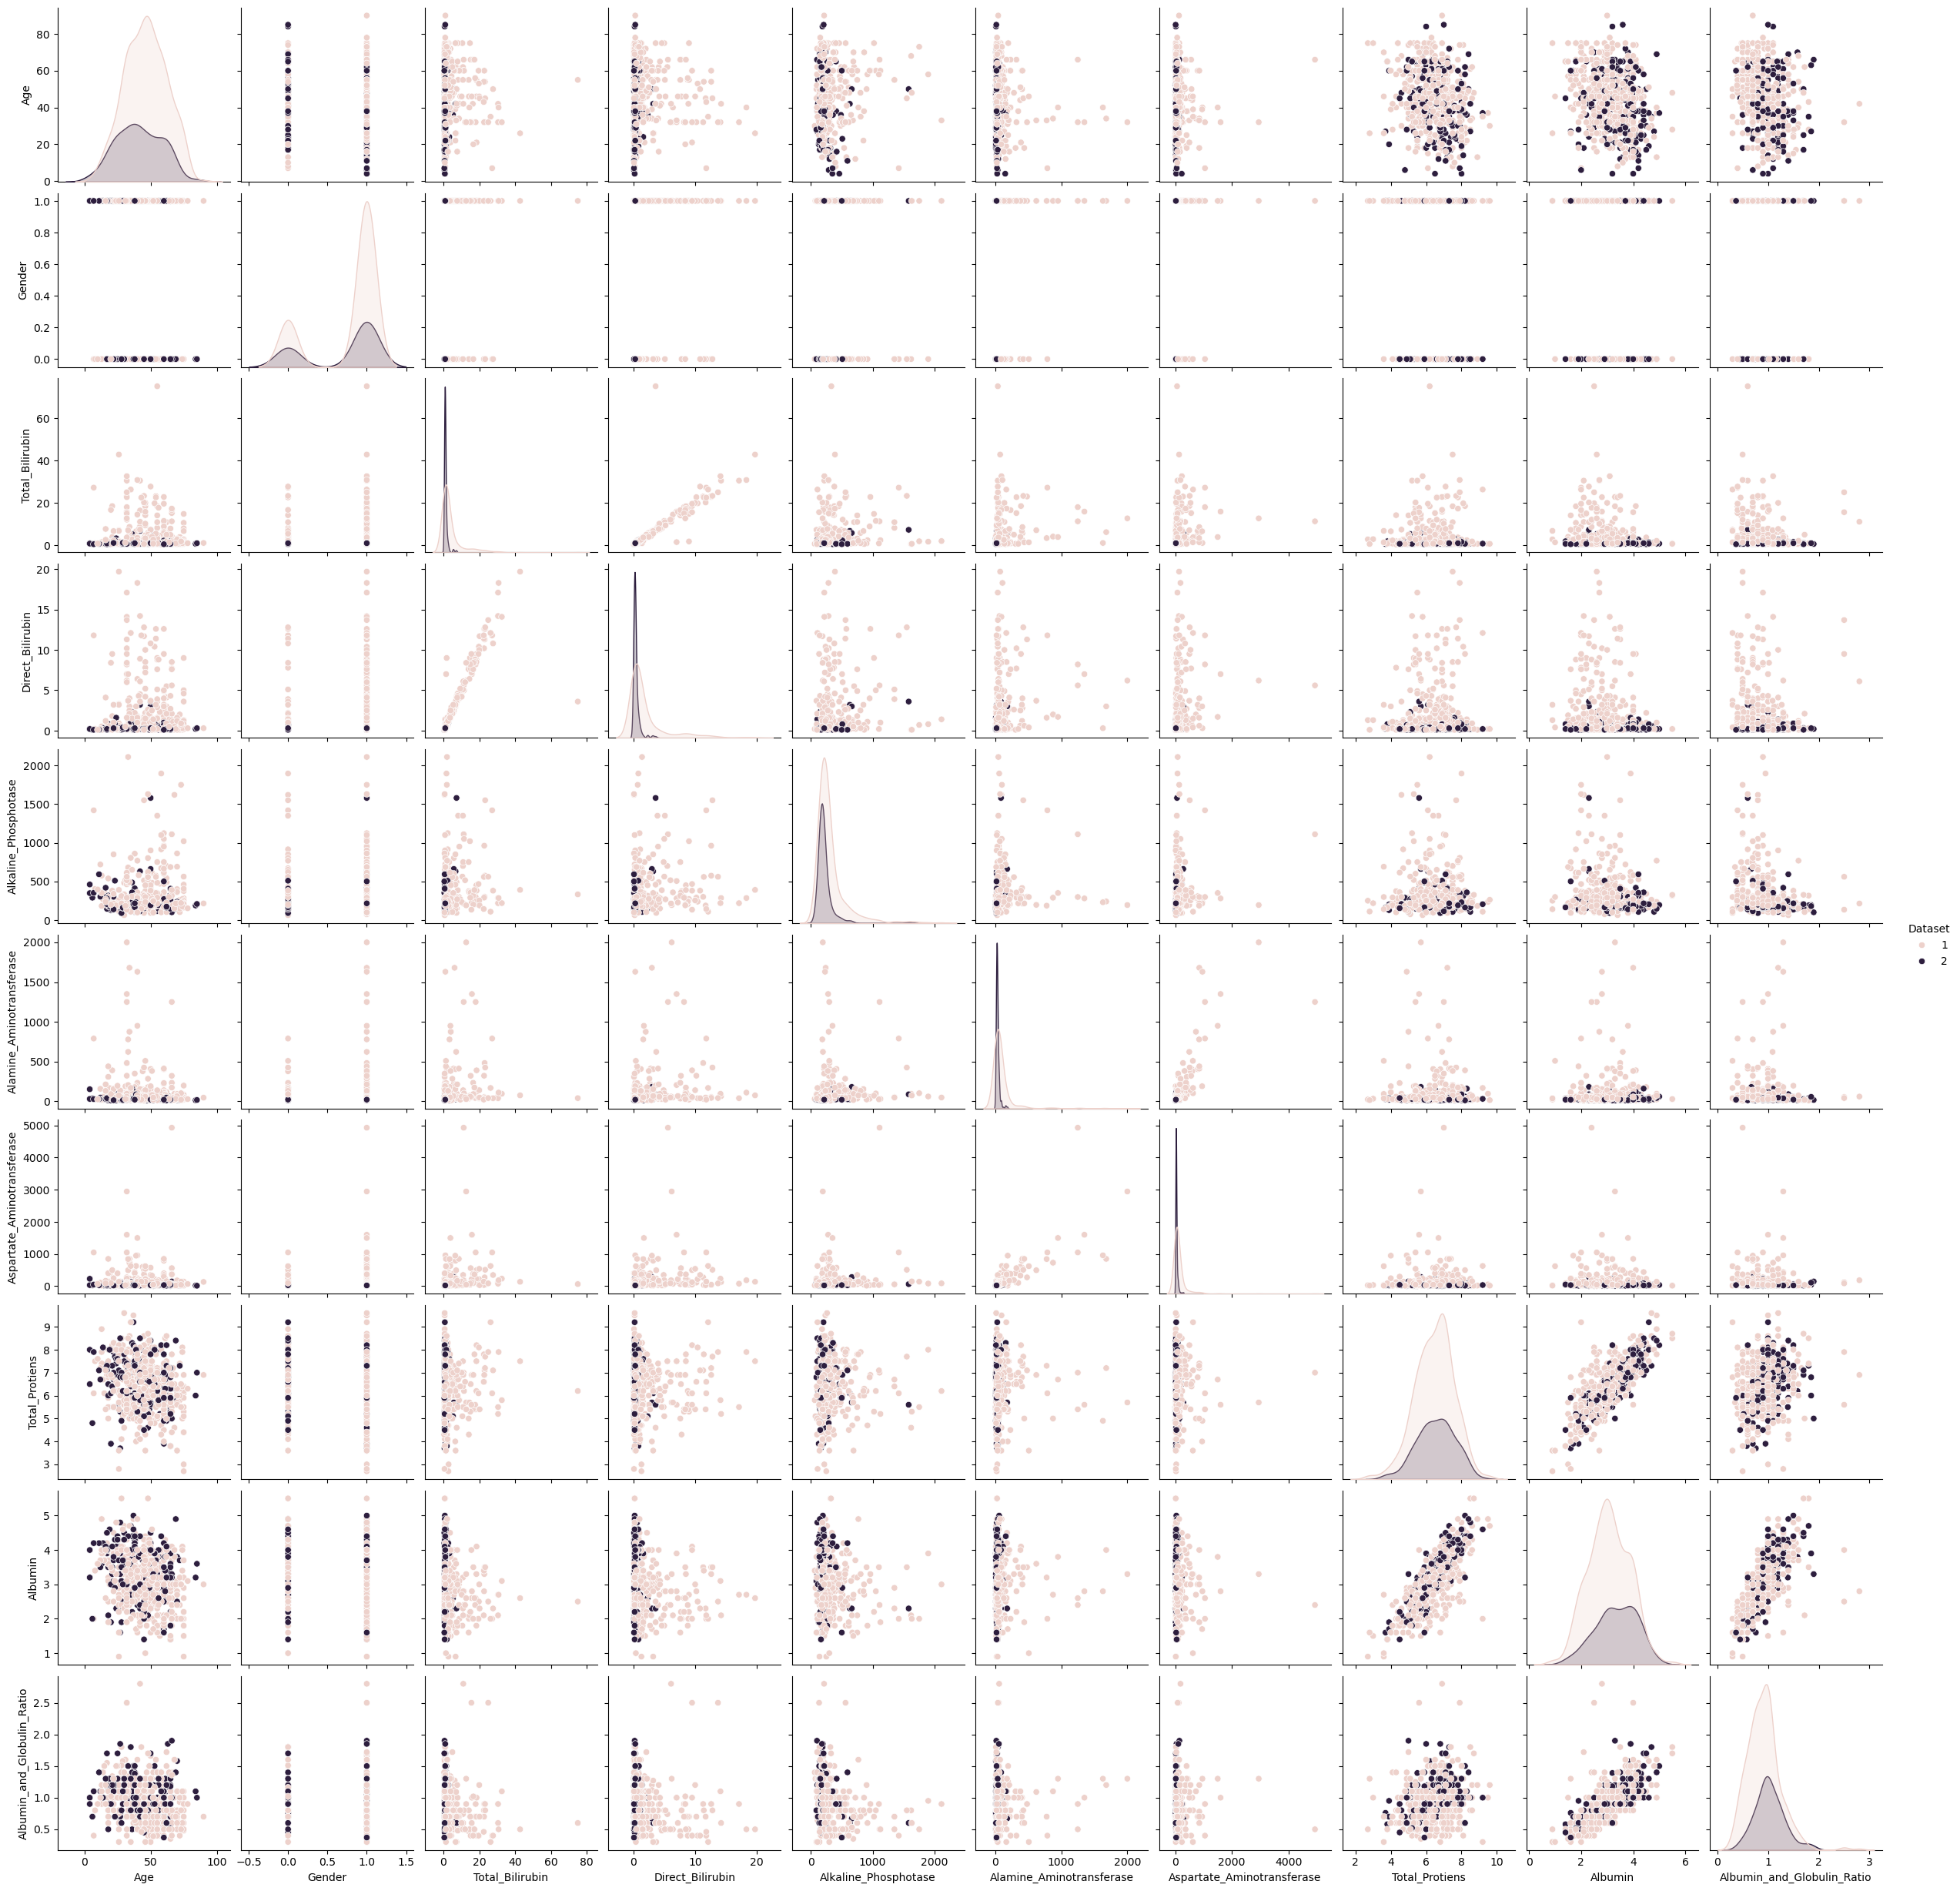

In [26]:
sns.pairplot(li_df, hue="Dataset")

In [28]:
# Map the values in the 'Dataset' column
li_df['Dataset'] = li_df['Dataset'].map({1: 0, 2: 1})

# Check the mapping
print(li_df['Dataset'].value_counts())


Dataset
0    416
1    167
Name: count, dtype: int64


In [82]:
li_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [86]:
df = li_df.dropna(axis = 0)
print(f"Before dropping all NaN values: {li_df.shape}")
print(f"After dropping all NaN values: {df.shape}")

Before dropping all NaN values: (583, 11)
After dropping all NaN values: (579, 11)


In [94]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


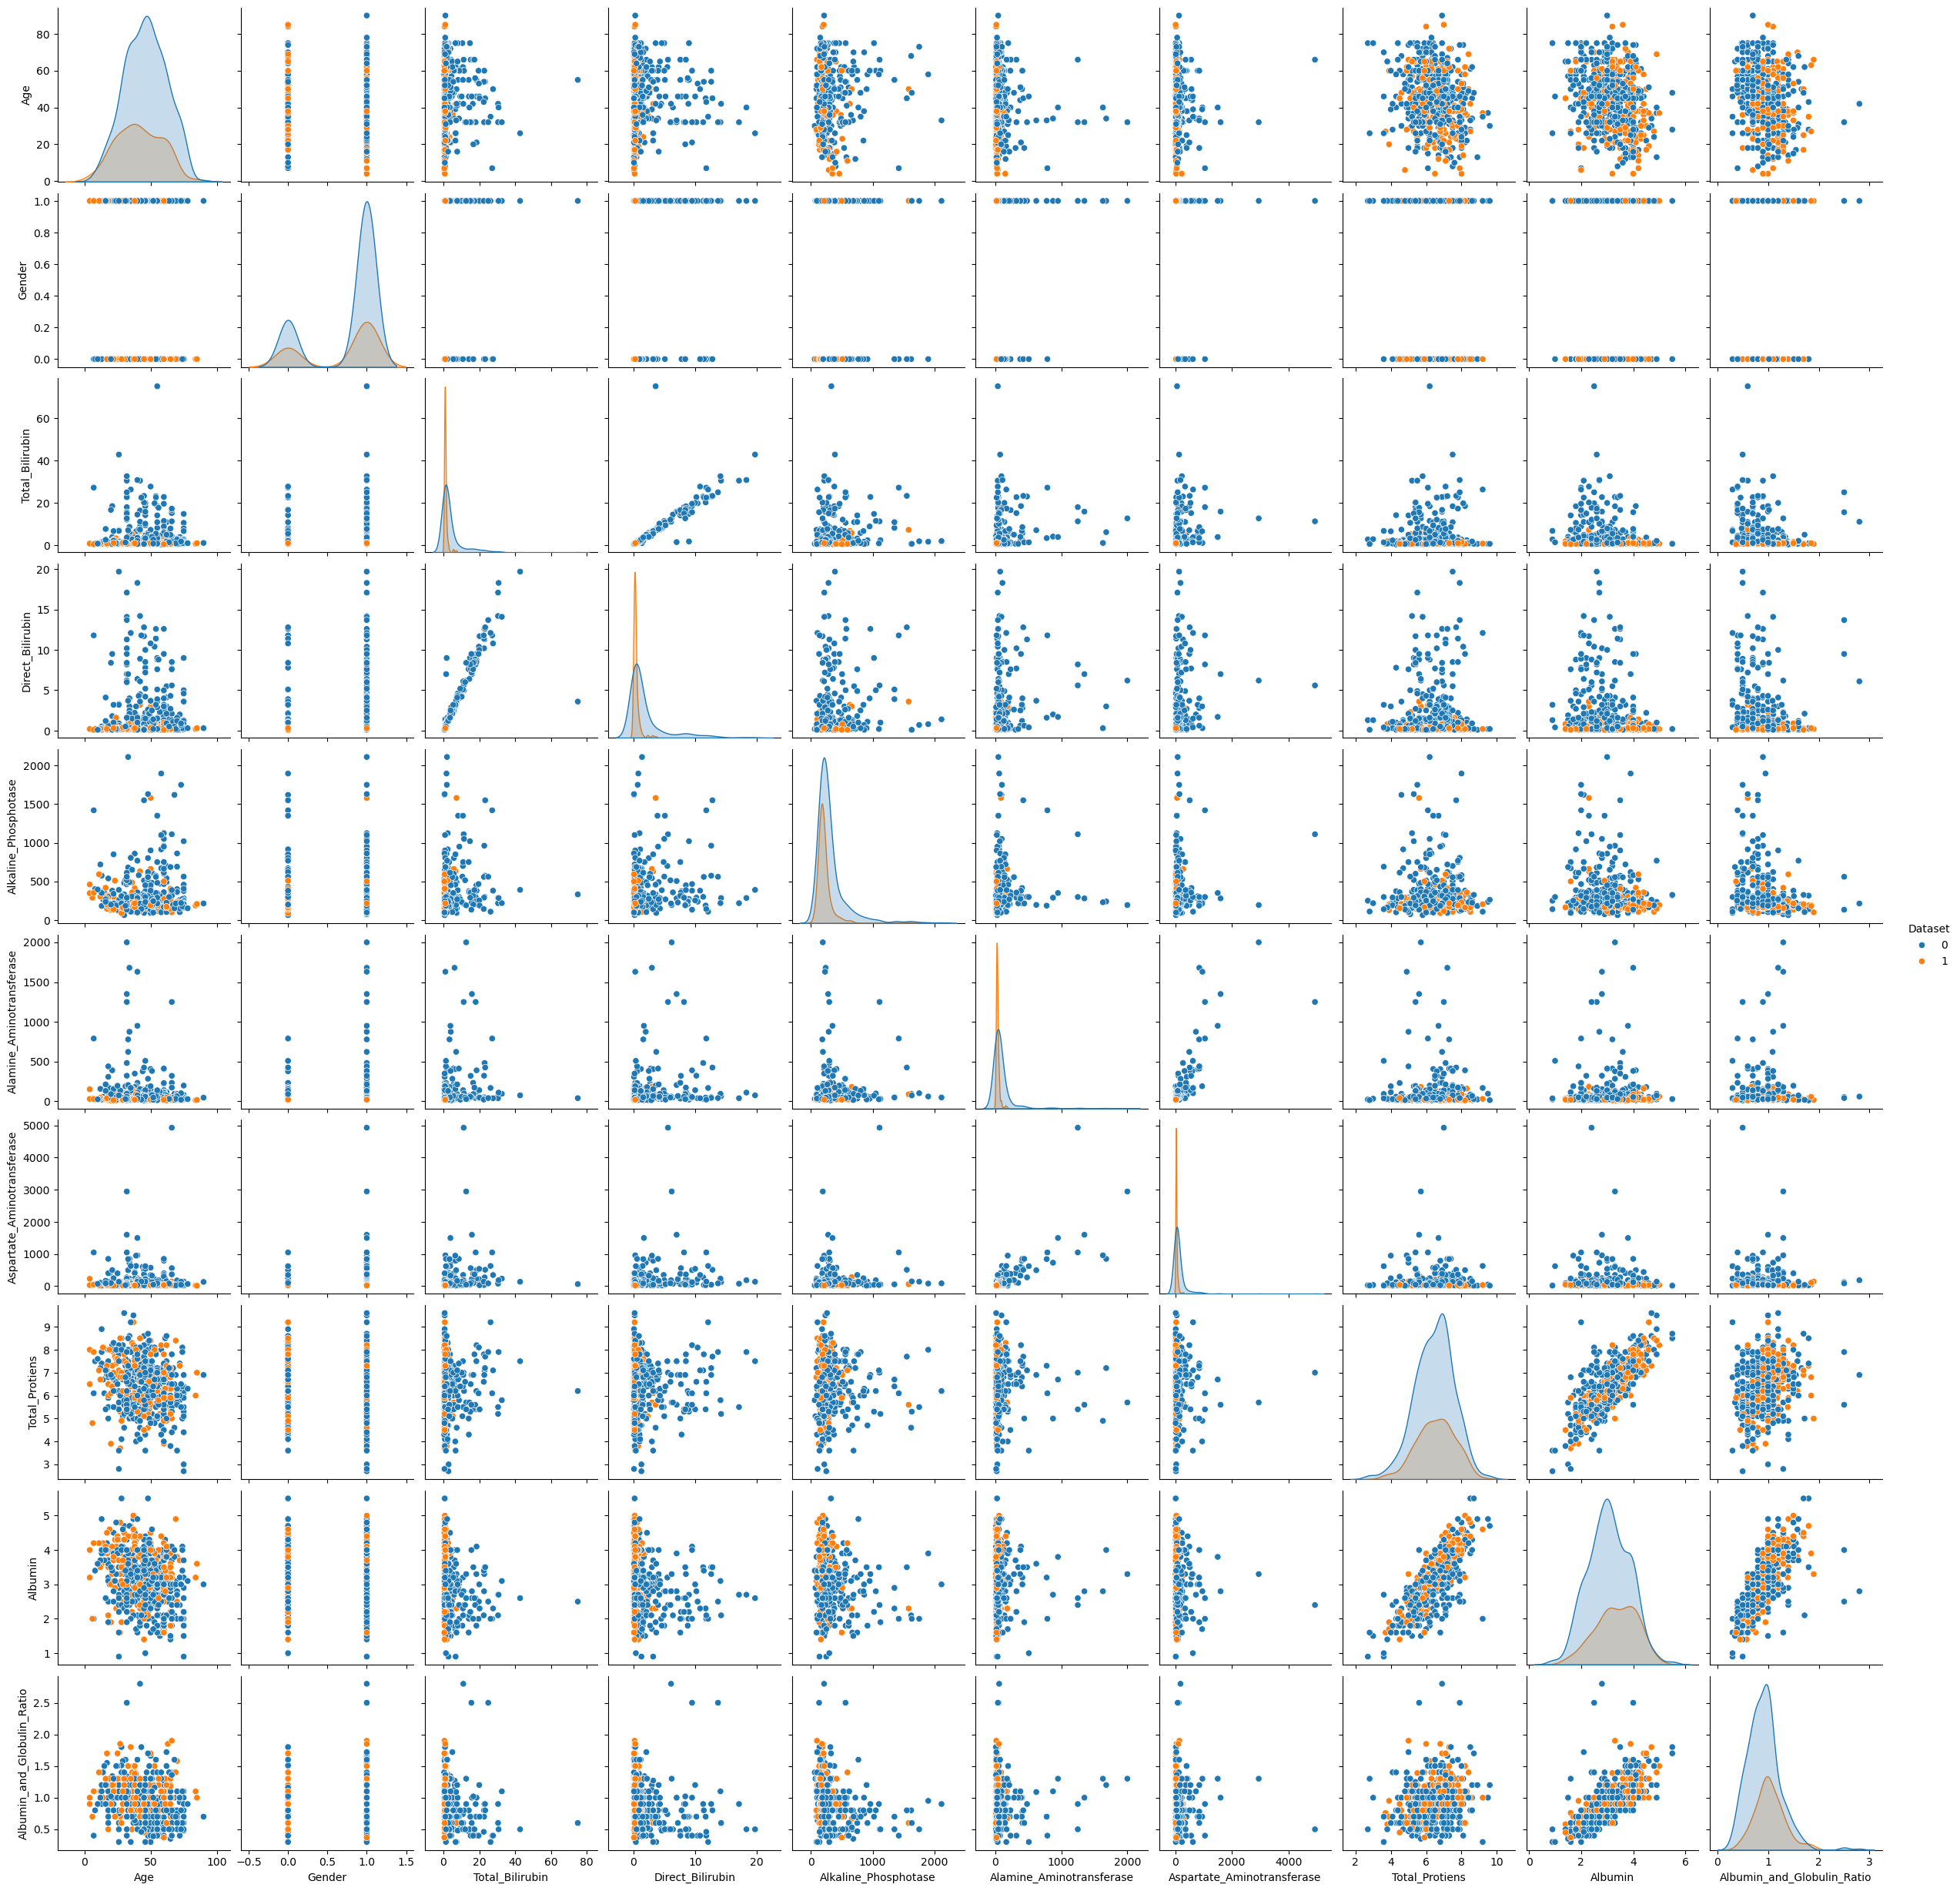

In [96]:
sns.pairplot(li_df, hue="Dataset")

In [98]:
numeric_cols = li_df.select_dtypes(include=['number']).columns
li_df.groupby('Dataset')[numeric_cols].mean()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Dataset,,,,,,,,,,,
0,46.153846,0.778846,4.164423,1.923558,319.007212,99.605769,137.699519,6.459135,3.060577,0.914179,0.0
1,41.239521,0.700599,1.142515,0.396407,219.754491,33.652695,40.688623,6.543114,3.344311,1.029576,1.0


In [100]:

X = li_df.drop(columns = ['Dataset'], axis=1)
Y = li_df['Dataset']


In [102]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Dataset, dtype: int64

In [104]:
X.shape

(583, 10)

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2 , stratify=Y, random_state=2)

In [108]:
Y_train.count()

466

In [110]:
X_train.value_counts()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  Albumin  Albumin_and_Globulin_Ratio
31   1       0.6              0.1               175                   48                        34                          6.0             3.7      1.60                          2
39   1       1.9              0.9               180                   42                        62                          7.4             4.3      1.38                          2
42   1       8.9              4.5               272                   31                        61                          5.8             2.0      0.50                          2
72   1       0.7              0.1               196                   20                        35                          5.8             2.0      0.50                          2
36   1       0.8              0.2               158                   29                        39  

In [156]:
print(X_train.isna().sum())


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
dtype: int64


In [168]:
# Drop rows with missing values in X_train
X_train = X_train.dropna()

# Align Y_train with the cleaned X_train
Y_train = Y_train[X_train_clean.index]


In [170]:
print(X_train.isna().sum())


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
dtype: int64


In [228]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2 , stratify=Y, random_state=2)

In [230]:
Y_train.count()

466

In [234]:
print(X_train.isna().sum())

Age                             0
Gender                        466
Total_Bilirubin                 0
Direct_Bilirubin                0
Alkaline_Phosphotase            0
Alamine_Aminotransferase        0
Aspartate_Aminotransferase      0
Total_Protiens                  0
Albumin                         0
Albumin_and_Globulin_Ratio      4
dtype: int64


In [236]:
X_train = X_train.dropna()

# Align Y_train with the cleaned X_train
Y_train = Y_train[X_train_clean.index]

In [238]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2 , stratify=Y, random_state=2)

In [240]:
Y_train.count()

466